In [86]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(ride_df, city_df, how='left', on='city')

# Display the data table for preview
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

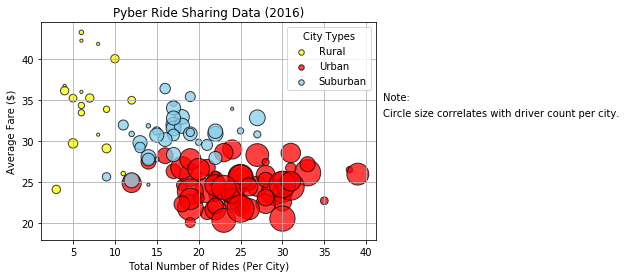

In [122]:
### Obtain the x and y coordinates for each of the three city types
limiting_data = combined_df.loc[:,["city","fare","driver_count","type"]]
type_data = limiting_data.groupby(["type","city"])

total_per_type = type_data["city"].count()
rural_num = total_per_type["Rural"]
urban_num = total_per_type["Urban"]
suburban_num = total_per_type["Suburban"]

scale = type_data["driver_count"].mean()
rural_scale = scale["Rural"]
urban_scale = scale["Urban"]
suburban_scale = scale["Suburban"]

average_fare = type_data["fare"].mean()
rural_avg = average_fare["Rural"]
urban_avg = average_fare["Urban"]
suburban_avg = average_fare["Suburban"]

# Build the scatter plots for each city types
plt1 = plt.scatter(rural_num, rural_avg, marker="o", facecolors="yellow", edgecolors="black",s=rural_scale * 10,alpha=.75)
plt2 = plt.scatter(urban_num, urban_avg, marker="o", facecolors="red", edgecolors="black",s=urban_scale * 10,alpha=.75)
plt3 = plt.scatter(suburban_num, suburban_avg, marker="o", facecolors="skyblue", edgecolors="black",s=suburban_scale * 10,alpha=.75)

# Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
leg = plt.legend(("Rural","Urban","Suburban"),loc='best',title="City Types")
leg.legendHandles[0]._sizes = [30]
leg.legendHandles[1]._sizes = [30]
leg.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42,35,"Note:")
plt.text(42,33,"Circle size correlates with driver count per city.")

# Save Figure
plt.savefig("Pyber_Bubble_Plot.png", bbox_inches="tight")

In [117]:
# Show plot
plt.show()

## Total Fares by City Type

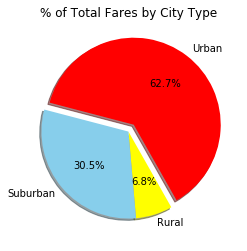

In [126]:
# Calculate Type Percents
by_type = limiting_data.groupby("type")

rural_fares = by_type["fare"].sum()["Rural"]
urban_fares = by_type["fare"].sum()["Urban"]
suburban_fares = by_type["fare"].sum()["Suburban"]

sizes = [rural_fares, urban_fares, suburban_fares]
labels = ["Rural","Urban","Suburban"]
colors =["yellow","red","skyblue"]
explode=[0,.1,0]

# Build Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=275)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Total_Fares_by_City_Type.png")

In [127]:
# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents


# Build Pie Chart

# Save Figure


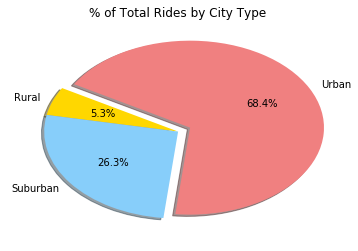

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


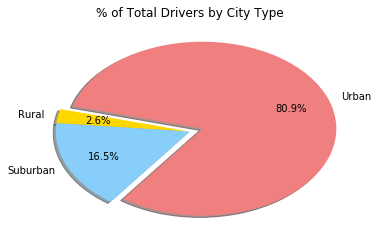

In [6]:
# Show Figure
plt.show()